<h3>Gradient của ảnh là gì? <h3>

Trước tiên ta phải dịch từ Gradient trong tiếng Anh là gì đã, gradient nghĩa là độ dốc. Trong xử lý ảnh, độ dốc (tức gradient) đang nói đến ở đây chính là độ dốc về mức sáng. Hay nói cách khác chính là sự thay đổi các giá trị pixel trong ảnh.

Vùng ảnh trơn (smooth) thì các pixel trong vùng ảnh đó có giá trị xấp xỉ / gần bằng nhau, vì vậy khi tính toán đạo hàm sẽ gần bằng zero. Đạo hàm bằng 0 thể hiện không có biến thiên về giá trị (mức sáng) (tham khảo bài viết Ý nghĩa Đạo Hàm). Điều này có nghĩa là độ dốc của các pixel trong vùng ảnh trơn gần bằng zero. Đạo hàm dương tại một pixel thể hiện rằng biến thiên mức sáng đang ở chiều hướng đi lên, ngược lại đạo hàm âm tại một pixel cho biết biên thiên mức sáng tại đó đang giảm dần. Nói tóm gọn lại gradient của ảnh chính là đạo hàm ảnh.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

___1. Laplacian___ 

Laplacian là thước đo đẳng hướng 2-D của đạo hàm không gian thứ 2 của một hình ảnh. Laplacian của một hình ảnh làm nổi bật các vùng thay đổi cường độ nhanh chóng và do đó thường được sử dụng để phát hiện cạnh (xem bộ phát hiện cạnh cắt bằng không ). Laplacian thường được áp dụng cho một hình ảnh lần đầu tiên được làm mịn bằng một cái gì đó xấp xỉ với bộ lọc làm mịn Gauss để giảm độ nhạy của nó với nhiễu, và do đó hai biến thể sẽ được mô tả cùng nhau ở đây. Toán tử thường lấy một hình ảnh graylevel duy nhất làm đầu vào và tạo ra một hình ảnh graylevel khác làm đầu ra.

In [12]:
img = cv.imread('sodoku.jpg',2)
laplacian2 = cv.Laplacian(img,cv.CV_64F)
blur = cv.GaussianBlur(img,(3,3),3)
laplacian1 = cv.Laplacian(blur,cv.CV_64F)
cv.imshow("img",img)
cv.imshow("blur",blur)
cv.imshow("laplacian1",laplacian1)
cv.imshow("laplacian2",laplacian2)
cv.waitKey(0)

-1

___2. Sobel___

Nó là một toán tử phân biệt rời rạc , tính toán xấp xỉ gradientcủa hàm cường độ ảnh. Tại mỗi điểm trong hình ảnh, kết quả của toán tử Sobel-Feldman là vectơ gradient tương ứng hoặc chuẩn của vectơ này. Toán tử Sobel-Feldman dựa trên việc biến đổi hình ảnh với một bộ lọc nhỏ, có thể phân tách và có giá trị số nguyên theo hướng ngang và dọc và do đó tương đối rẻ về mặt tính toán. Mặt khác, xấp xỉ gradient mà nó tạo ra tương đối thô, đặc biệt đối với các biến thể tần số cao trong hình ảnh.

In [13]:
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=1)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=1)
sobelx1 = cv.Sobel(blur,cv.CV_64F,1,0,ksize=1)
sobely1 = cv.Sobel(blur,cv.CV_64F,0,1,ksize=1)
cv.imshow("sobelx",sobelx)
cv.imshow("sobely",sobely)
cv.imshow("sobelx1",sobelx1)
cv.imshow("sobely1",sobely1)
cv.waitKey(0)

-1

___One Important Matter!___

Chuyển đổi Đen sang Trắng được coi là độ dốc Dương (nó có giá trị dương) trong khi chuyển đổi Trắng sang Đen được coi là độ dốc Âm (Nó có giá trị âm). Vì vậy, khi bạn chuyển đổi dữ liệu thành np.uint8, tất cả các độ dốc âm đều bằng không. Nói một cách dễ hiểu, bạn bỏ lỡ lợi thế đó.

Nếu bạn muốn phát hiện cả hai cạnh, tùy chọn tốt hơn là giữ kiểu dữ liệu đầu ra thành một số dạng cao hơn, như cv.CV_16S, cv.CV_64F, v.v., lấy giá trị tuyệt đối của nó và sau đó chuyển đổi trở lại cv.CV_8U. Đoạn mã dưới đây minh họa quy trình này cho bộ lọc Sobel ngang và sự khác biệt trong kết quả.

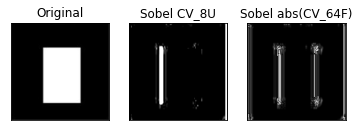

In [16]:
img = cv.imread('origin.jpg',0)
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()